# Plotting with Pandas

Os testes realizados neste notebook visam consolidar o conteúdo visto na vídeo-aula 21 do curso, onde foram utilizadas funções e atributos do pacote matplotlib, em união com o pandas, para plotagem de gráficos diversos.

In [1]:
# Importando bibliotecas
import pandas as pd

# Comando especial do Jupyter Notebook para habilitar a visualização de gráficos matplotlib no próprio notebook.
# Dessa forma, não serão abertas novas janelas a cada solicitação de plotagem.
% matplotlib inline

In [3]:
# Para realização dos testes, será utilizado o único Dataset disponível localmente na máquina: projeto 1 - bike sharing
path = 'C:/Users/thiagoPanini/Downloads/chicago.csv'
df_bike = pd.read_csv(path)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551505 entries, 0 to 1551504
Data columns (total 8 columns):
Start Time       1551505 non-null object
End Time         1551505 non-null object
Trip Duration    1551505 non-null int64
Start Station    1551505 non-null object
End Station      1551505 non-null object
User Type        1551505 non-null object
Gender           1234638 non-null object
Birth Year       1234822 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 94.7+ MB


## <font color='blue'> Histograma </font>
### .hist()

Útil quando todas as colunas do Dataset são do tipo numérico. No exemplo utilizado na vídeo aula, isto era verdade (cancer_dataset), entretando não é o caso do Dataset de bike_sharing. Vejamos como treinar os conceitos...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B980623400>,
      dtype=object)

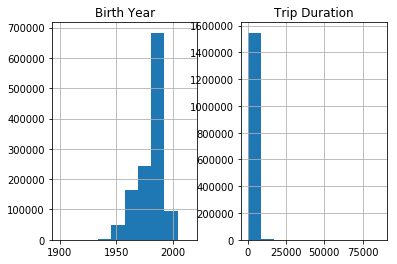

In [4]:
df_bike.hist()

Ao chamar a função .hist() em todo o DataFrame, as colunas numéricas foram idendificadas de maneira automática e seus gráficos foram plotados. Entretanto, visualmente não está legal. Vamos passar alguns parâmetros para a função .hist() afim de melhorar a visualização.
#### figsize=(largura, altura)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9807C1400>,
      dtype=object)

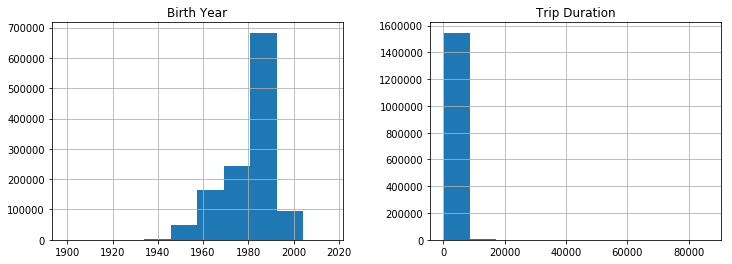

In [7]:
df_bike.hist(figsize=(12, 4))

#### Detalhe importante: 
Perceba que, após a execução da função, a saída mostrada na célula refere-se a um array (provavelmente 2, 2 = eixos x e y). Com o conteúdo de Numpy aprendido até aqui, foi possível identificar essa saída. Provavelmente, no decorrer do curso, a integração entre todas estas bibliotecas se dará de maneira mais clara. <b> Acrescentar um ";" no final da linha de código elimina este "output indesejado"</b>

#### Análise:
Nitidamente, o histograma não é o melhor gráfico para representar os dois atributos em questão (Birth Year e Trip Duration), uma vez que os valores são restritos, não permitindo ao gráfico demonstrar um range adequado de valores. Provavelmente há funções que tratam isto, entretando acredito que um outro tipo de gráfico seria mais adequado.

In [12]:
# Outras maneiras de plotar histogramas:

"""Em uma coluna em específico"""
# df_bike['Birth Year'].hist(figsize=(12, 4));

"""Através de um plot geral"""
# df_bike['Trip Duration'].plot(kind='hist');

'Através de um plot geral'

 ## <font color='blue'> Gráfico de Barras </font>
 ### .value_counts()
 ### .plot(kind='bar')
 Vamos analisar alguns detalhes referentes aos gráficos de barras. Neste ponto, será utilizada a função .value_counts() que, por sua vez, tem por objetivo retornar o número de instâncias em determinada coluna do DataFrame e quantas vezes estas se repetem. Este dado será o elemento principal dentro do nosso gráfico de barras. Vejamos.

In [14]:
df_bike['Birth Year'].value_counts()

1989.0    76489
1991.0    64447
1988.0    64041
1990.0    63643
1987.0    62329
1986.0    60082
1992.0    56191
1984.0    54524
1985.0    53702
1983.0    45211
1982.0    44005
1993.0    43932
1981.0    38406
1980.0    34901
1979.0    27255
1977.0    25973
1978.0    25291
1994.0    25132
1976.0    21303
1975.0    20761
1974.0    20015
1970.0    19027
1969.0    18422
1968.0    16983
1972.0    16771
1973.0    16337
1966.0    15529
1971.0    15171
1964.0    14723
1962.0    14551
          ...  
1948.0      788
1999.0      617
1944.0      414
2000.0      400
1947.0      385
1918.0      294
1939.0      198
1921.0      194
1942.0      187
1940.0      156
1934.0      145
1941.0      103
1900.0       97
2001.0       71
1899.0       52
1943.0       49
1901.0       41
1906.0       26
1930.0       24
1916.0       24
1938.0       17
2004.0       14
2016.0       14
2003.0       13
1931.0       10
1909.0        9
2002.0        8
1923.0        2
1936.0        1
1915.0        1
Name: Birth Year, Length

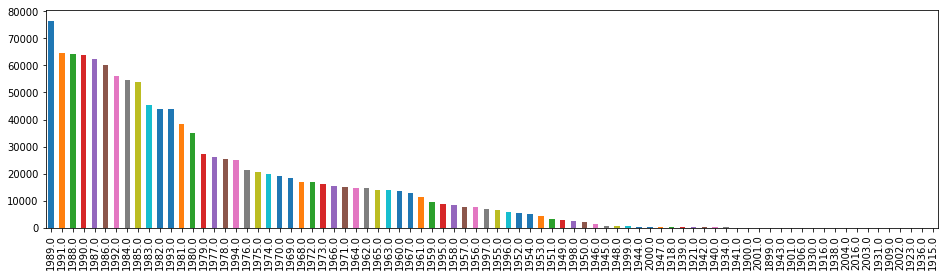

In [17]:
df_bike['Birth Year'].value_counts().plot(kind='bar', figsize=(16, 4))

#### Análise:
Mais uma vez, foi possível identificar que o gráfico não apresentou uma boa visualização dos dadods. Neste caso, este fato pode ser atribuito a grande quantidade de instâncias diferentes dentro da coluna Birth Year. Um outro ponto a ser destacado foi que o gráfico automaticamente ordenou o eixo x de acordo com os maiores valores obtidos no eixo y, e não por ordem numérica, o que dificulta também a análise, visto que tem-se anos subsequentes em diferentes ordens.

 ## <font color='blue'> Gráfico de Pizza </font>
 ### .value_counts()
 ### .plot(kind='pie')
 Iremos demonstrar um exemplo de gráfico de pizza, porém, de acordo com os resultados obtidos nos gráficos anteriores e, conhecendo a capacidade e variação das colunas numéricas do DataFrame utilizado, já é de conhecimento prévio que os resultados não serão visualmente ótimos.

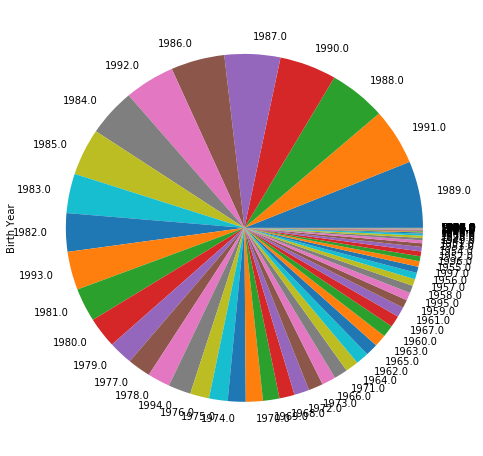

In [20]:
df_bike['Birth Year'].value_counts().plot(kind='pie', figsize=(8, 8));

 ## <font color='blue'> Gráfico de Dispersao </font>
 ### pd.plotting.scatter_matrix(df, figsize=(largura, altura))
 ### df.plot(x='column_a', y='column_b', kind='scatter')
 
 Vejamos agora alguns exemplos de gráficos de Dispersão.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B999248710>,
      dtype=object)

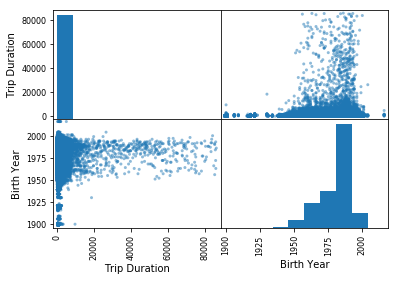

In [21]:
# Abaixo, usaremos uma função capaz de identificar todas as colunas numéricas do Dataset e mostrar correlações.
# A função retorna um gráfico de Dispersão e um Histograma para cada coluna do Dataset.

pd.plotting.scatter_matrix(df_bike)

#### Análise:
Mais uma vez percebe-se que a limitação do Dataset utilizado não permite uma boa visualização dos dados por meio dos gráficos. Ou então, de acordo com a teoria estatística, pode-se dizer que estas duas variáveis <b>não possuem correlação direta</b>.

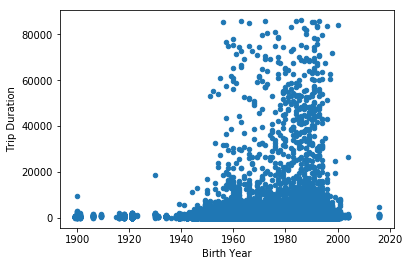

In [22]:
# Plotando gráficos de Dispersão individualmente
df_bike.plot(x='Birth Year', y='Trip Duration', kind='scatter')

 ## <font color='blue'> Gráfico de Caixa (Box) </font>
 ### df['column_name'].plot(kind='box')
 
 Vejamos agora alguns exemplos de gráficos de Caixa (Box).

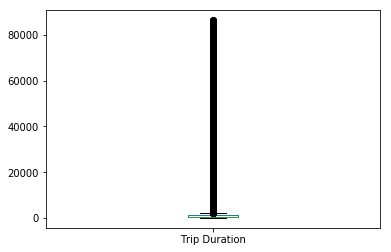

In [23]:
df_bike['Trip Duration'].plot(kind='box')

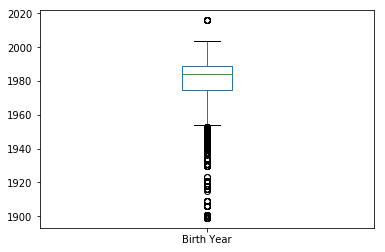

In [24]:
df_bike['Birth Year'].plot(kind='box')

## Links úteis
Para melhor entendimento dos tipos de correlação com gráficos de Dispersão, segue link:

[Tipos-de-correlacao](http://www.futebolmetria.com/correla--o-estat-stica.html)

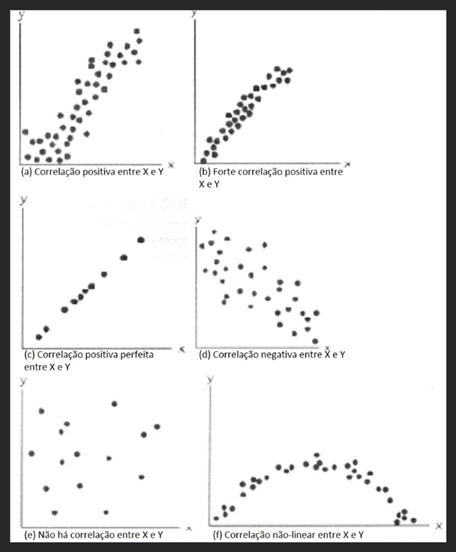

### Links Úteis

Análise de BoxPlot:
[Interpretando-Box-Plot](http://www.portalaction.com.br/estatistica-basica/31-boxplot)

Definição Outlier (análise com BoxPlot):
[Outlier-Wikipedia](https://en.wikipedia.org/wiki/Outlier)

Outlier em BoxPlot
[Outlier-BoxPlot](https://www.r-statistics.com/2011/01/how-to-label-all-the-outliers-in-a-boxplot/)

Outra definição de Outlier
[Outlier-Definition](https://www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/)